# Imports

In [2]:
import os
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

In [3]:
all_mice = ['jl009', 'fz009', 'jl011', 'fz006', 'fz008', 'fz016', 'fz017', 'se063']
drives = ['Z', 'Y', 'X', 'W', 'Z', 'X', 'W', 'Y']
outcome_list = ['Hit', 'Miss', 'FA', 'CR']

In [4]:
def load_behavior_txt(fpath):
    res = np.zeros((100, 13))
    with open(fpath,'r') as f:
        for nline, line in enumerate(f.readlines()):
            line = line.strip()
            row = line.split(',')
            for k, v in enumerate(row):
                res[nline, k] = v
    return res

# Raw data

In [1]:
mouse_name = 'jl009'
data_path = "Z:/Jenni/{}/behavimaging.mat".format(mouse_name)
mat = scipy.io.loadmat(data_path)

In [2]:
data = mat['behavimaging']
print(data.shape)

(1, 41)


In [3]:
print(data[0, 0].dtype)

[('day', 'O'), ('block', 'O'), ('imagingfilename', 'O'), ('behaviorfilename', 'O'), ('nbaxonsperplane', 'O'), ('imagingdata', 'O'), ('MeanImg', 'O'), ('ycoord', 'O'), ('xcoord', 'O'), ('behavdata', 'O')]


In [4]:
dtypes = [('day', 'O'), ('block', 'O'), ('imagingfilename', 'O'), ('behaviorfilename', 'O'), ('nbaxonsperplane', 'O'), ('imagingdata', 'O'), ('MeanImg', 'O'), ('ycoord', 'O'), ('xcoord', 'O'), ('behavdata', 'O')]
dnames = []
for i in range(10):
    dnames.append(dtypes[i][0])
print(dnames)

['day', 'block', 'imagingfilename', 'behaviorfilename', 'nbaxonsperplane', 'imagingdata', 'MeanImg', 'ycoord', 'xcoord', 'behavdata']


In [5]:
block = data[0, 0]

In [6]:
# basic info of recording
for name in dnames[:4]:
    print(name, block[name]) # number of axons per plan

day [[1]]
block [[1]]
imagingfilename [[array(['JL009_002_000'], dtype='<U13')]]
behaviorfilename ['jl009_1v1']


In [7]:
imw, imh = block['MeanImg'][0,0].shape
meanimg = np.zeros((2, imw, imh))
meanimg[0] = block['MeanImg'][0,0]
meanimg[1] = block['MeanImg'][0,1]
print('mean img: ', meanimg.shape)

xpos1 = block['xcoord'][0,0][0]
xpos2= block['xcoord'][0,1][0]
print('xpos: ', xpos1.shape, xpos2.shape)

ypos1 = block['ycoord'][0,0][0]
ypos2= block['ycoord'][0,1][0]
print('ypos: ', ypos1.shape, ypos2.shape)

behavior = block['behavdata']
print('behavior: ', behavior.shape)

spks = block['imagingdata']
print('spks', spks.shape)

mean img:  (2, 403, 697)
xpos:  (109,) (66,)
ypos:  (109,) (66,)
behavior:  (4, 13540)
spks (175, 13540)


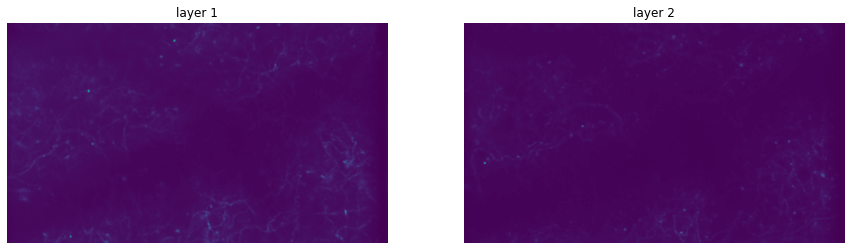

In [27]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.imshow(meanimg[0])
plt.title('layer 1')
plt.axis('off')
plt.subplot(122)
plt.imshow(meanimg[1])
plt.title('layer 2')
plt.axis('off')
plt.show()

In [18]:
norm_meanimg = meanimg.copy()
norm_meanimg[0] = (meanimg[0] - np.mean(meanimg[0]))/np.std(meanimg[0])
norm_meanimg[1] = (meanimg[1] - np.mean(meanimg[1]))/np.std(meanimg[1])
print(norm_meanimg.min(), norm_meanimg.max())
# zscore has no effect in imshow

-1.8221711514423837 85.73838870301944


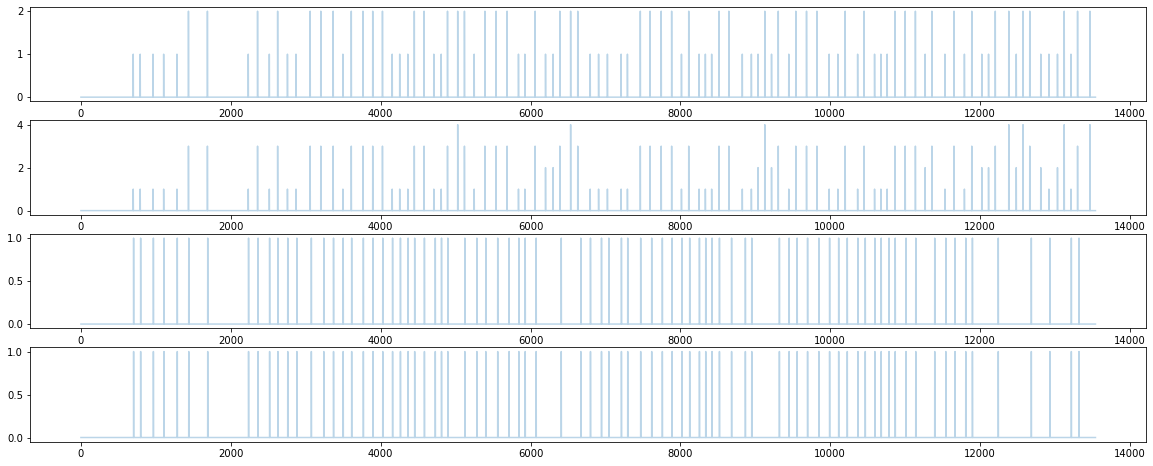

In [37]:
x = np.arange(behavior.shape[1])
plt.figure(figsize=(20, 8))
plt.subplot(411)
plt.plot(x, behavior[0], alpha=0.3, label='1')
plt.subplot(412)
plt.plot(x, behavior[1], alpha=0.3, label='2')
plt.subplot(413)
plt.plot(x, behavior[2], alpha=0.3, label='3')
plt.subplot(414)
plt.plot(x, behavior[3], alpha=0.3, label='3')
# plt.legend()
plt.show()

In [40]:
print(spks.min(), spks.max())

29.483131 3474.9802


In [41]:
NA, NT = spks.shape
print('number of axons: ', NA)
print('number of frames: ', NT)

number of axons:  175
number of frames:  13540


In [ ]:
# normalize spks

In [8]:
# behavior
print('behavior: ', behavior.shape)

behavior:  (4, 13540)


In [11]:
for i in range(4):
    behav1 = behavior[i]
    print(behav1.shape, np.min(behav1), np.max(behav1))

(13540,) 0 2
(13540,) 0 4
(13540,) 0 1
(13540,) 0 1


In [13]:
# in JL009, block1, first lick == all lick
np.sum(behavior[2]==behavior[3])

13540

In [14]:
print('number of trials in block 1:', np.sum(behavior[0]>0))

number of trials in block 1: 100


# ALL info

In [94]:
# basic info of recording
for i in range(41):
    block = data[0, i]
    for name in dnames[:4]:
        print(name, block[name]) # number of axons per plan

day [[1]]
block [[1]]
imagingfilename [[array(['JL009_002_000'], dtype='<U13')]]
behaviorfilename ['jl009_1v1']
day [[1]]
block [[2]]
imagingfilename [[array(['JL009_002_001'], dtype='<U13')]]
behaviorfilename ['jl009_1v2']
day [[1]]
block [[3]]
imagingfilename [[array(['JL009_002_002'], dtype='<U13')]]
behaviorfilename ['jl009_1v3']
day [[2]]
block [[1]]
imagingfilename [[array(['JL009_003_000'], dtype='<U13')]]
behaviorfilename ['jl009_2v1']
day [[2]]
block [[2]]
imagingfilename [[array(['JL009_003_001'], dtype='<U13')]]
behaviorfilename ['jl009_2v2']
day [[2]]
block [[3]]
imagingfilename [[array(['JL009_003_002'], dtype='<U13')]]
behaviorfilename ['jl009_2v3']
day [[3]]
block [[1]]
imagingfilename [[array(['JL009_004_000'], dtype='<U13')]]
behaviorfilename ['jl009_3v1']
day [[3]]
block [[2]]
imagingfilename [[array(['JL009_004_001'], dtype='<U13')]]
behaviorfilename ['jl009_3v2']
day [[3]]
block [[3]]
imagingfilename [[array(['JL009_004_002'], dtype='<U13')]]
behaviorfilename ['jl00

# performance

In [ ]:
# True positive (TP) - hit 1
# False negative (FN) - miss 2
# False positive (FP - FL 3
# True negative (TN) - CR 4

In [16]:
TP = np.sum(behavior[1] == 1)
FN = np.sum(behavior[1] == 2)
FP = np.sum(behavior[1] == 3)
TN = np.sum(behavior[1] == 4)
print('true\predict')
print('P    ', TP, FN)
print('N    ', FP, TN)

true\predict
P     40 10
N     43 7


In [17]:
acc = TP + TN
print('accuracy: ', acc)

accuracy:  47


In [6]:
nBlocks = data.shape[-1]
res = np.zeros((4, nBlocks))
containPB = np.zeros(nBlocks)
nPB = np.zeros(nBlocks)
for i in range(nBlocks):
    block = data[0, i]
    behavior = block['behavdata']
    spks = block['imagingdata']
    print('Block {} behavior shape: {}, spks: {}'.format(
        i+1, behavior.shape, spks.shape))
    if behavior.shape[-1] > 0:
        nPB[i] = np.sum(behavior[0]>2)
        for j in range(4):
            res[j, i] = np.sum(behavior[1] == j+1)
        if behavior[0].max() == 4:
            containPB[i] = 1

Block 1 behavior shape: (4, 13540), spks: (175, 13540)
Block 2 behavior shape: (4, 11474), spks: (175, 11474)
Block 3 behavior shape: (4, 9940), spks: (175, 9940)
Block 4 behavior shape: (4, 12694), spks: (141, 12694)
Block 5 behavior shape: (4, 11763), spks: (141, 11763)
Block 6 behavior shape: (4, 10724), spks: (141, 10724)
Block 7 behavior shape: (4, 12837), spks: (205, 12837)
Block 8 behavior shape: (4, 11079), spks: (205, 11079)
Block 9 behavior shape: (4, 9749), spks: (205, 9749)
Block 10 behavior shape: (4, 12036), spks: (139, 12036)
Block 11 behavior shape: (4, 11169), spks: (139, 11169)
Block 12 behavior shape: (4, 12982), spks: (158, 12982)
Block 13 behavior shape: (4, 11402), spks: (158, 11402)
Block 14 behavior shape: (1, 0), spks: (1, 0)
Block 15 behavior shape: (4, 13034), spks: (169, 13034)
Block 16 behavior shape: (4, 12764), spks: (169, 12764)
Block 17 behavior shape: (4, 9911), spks: (169, 9911)
Block 18 behavior shape: (4, 13208), spks: (171, 13208)
Block 19 behavior

In [44]:
containPB = containPB.astype('int')

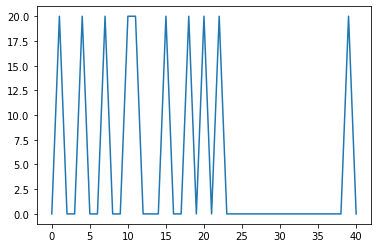

In [8]:
x = np.arange(nBlocks)
plt.plot(x, nPB)

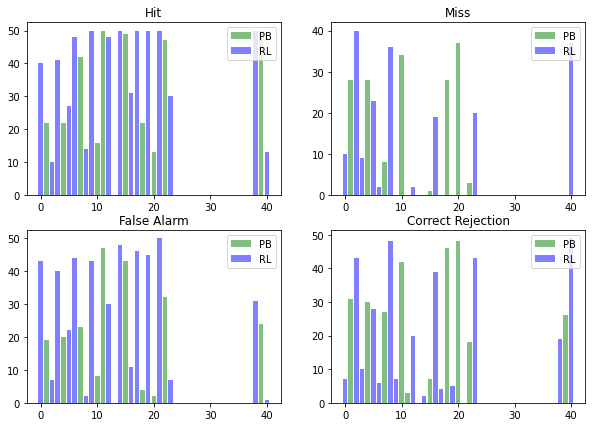

In [54]:
titles = ['Hit', 'Miss', 'False Alarm', 'Correct Rejection']
colors = np.array(["green", "blue"])
plt.figure(figsize=(10, 7))
for i in range(4):
    plt.subplot(2,2,i+1)
    pbidx = np.where(containPB==1)
    nonpbidx = np.where(containPB==0)[0]
    plt.bar(x[pbidx], res[i, pbidx].squeeze(), color=colors[0], alpha=0.5, label='PB')
    plt.bar(x[nonpbidx], res[i, nonpbidx].squeeze(), color=colors[1], alpha=0.5, label='RL')
    plt.title(titles[i])
    plt.legend()

(0.0, 100.0)

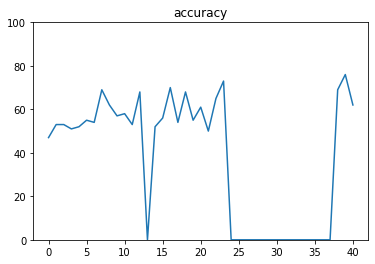

In [58]:
acc = res[0] + res[3]
plt.plot(x, acc)
plt.title('accuracy')
plt.ylim([0, 100])

# reproduce previous behavior result

In [3]:
mice = ['jl009', 'fz009', 'jl011', 'fz016', 'fz017']
drives = ['Z', 'Y', 'X', 'K', 'W']
# fz009 only have one probe block, with total 11 block
# jl009 and fz017 are for axon activity analysis

In [50]:
n = 4
mouse_name = mice[n]
# data_path = '\\pbs-kk-labserv.win.ad.jhu.edu/data12/Jenni/fz009/behavimaging.mat'
data_path = "{}:/Jenni/{}/behavimaging.mat".format(drives[n], mouse_name)
mat = scipy.io.loadmat(data_path)
data = mat['behavimaging']

## behavior from preprocessed data

In [51]:
nBlocks = data.shape[-1]
pbRes = np.zeros((4, nBlocks))
rlRes = np.zeros((4, nBlocks))
nPB = np.zeros(nBlocks)
for i in range(nBlocks):
    block = data[0, i]
    behavior = block['behavdata']
    if behavior.shape[-1] > 0:
        nPB[i] = np.sum(behavior[0]>2)
        outcome = behavior[1]
        if nPB[i] > 0:
            pbIdx = np.where(behavior[0]>2)
            pbOutcome = outcome[pbIdx]
            for j in range(4):
                pbRes[j, i] = np.sum(pbOutcome == j+1) / nPB[i]
        
        rlIdx = np.where(behavior[0]<3)
        rlOutcome = outcome[rlIdx]
        for j in range(4):
            rlRes[j, i] = np.sum(rlOutcome == j+1) / (100 - nPB[i])

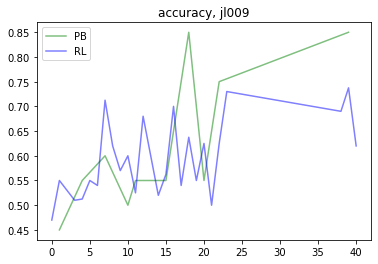

In [20]:
ptrue = pbRes[0] + pbRes[3]
rtrue = rlRes[0] + rlRes[3]

p_nonzero = np.where(ptrue>0)
r_nonzero = np.where(rtrue>0)
plt.plot(x[p_nonzero], ptrue[p_nonzero], color=colors[0], alpha=0.5, label='PB')
plt.plot(x[r_nonzero], rtrue[r_nonzero], color=colors[1], alpha=0.5, label='RL')
plt.title('accuracy, {}'.format(mouse_name))
plt.legend()

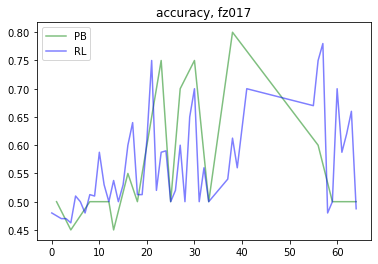

In [52]:
x = np.arange(nBlocks)
ptrue = pbRes[0] + pbRes[3]
rtrue = rlRes[0] + rlRes[3]

p_nonzero = np.where(ptrue>0)
r_nonzero = np.where(rtrue>0)
plt.plot(x[p_nonzero], ptrue[p_nonzero], color=colors[0], alpha=0.5, label='PB')
plt.plot(x[r_nonzero], rtrue[r_nonzero], color=colors[1], alpha=0.5, label='RL')
plt.title('accuracy, {}'.format(mouse_name))
plt.legend()

## from single mouse behavior files

In [6]:
n = -1
mouse_name = all_mice[n]
beh_data_path = "{}:/Jenni/{}/behavior/justbehavior".format(drives[n], mouse_name)
if mouse_name == 'se063':
    beh_data_path = "{}:/Sarah/{}/behavior".format(drives[n], mouse_name)
fnames = [_ for _ in os.listdir(beh_data_path) if _.endswith('txt')]

from tkinter import Tcl
fnames = Tcl().call('lsort', '-dict', fnames)

In [14]:
nBlocks = len(fnames)
pbRes = np.zeros((4, nBlocks))
rlRes = np.zeros((4, nBlocks))
nPB = np.zeros(nBlocks)
days = np.zeros(nBlocks)
for i in range(nBlocks):
    tmp = fnames[i].split('.')
    if len(tmp) == 2:
        tmp = fnames[i].split('_')[-1]
        days[i] = int(tmp.split('v')[0])
        fpath = os.path.join(beh_data_path, fnames[i])
        bmat = load_behavior_txt(fpath)
        behavior = bmat[:, 12].reshape(-1).astype(int)
        outcome = bmat[:, 3].reshape(-1).astype(int)
        nPB[i] = np.sum(behavior==0)
        if nPB[i] > 0:
            pbIdx = np.where(behavior==0)
            pbOutcome = outcome[pbIdx]
            for j in range(4):
                pbRes[j, i] = np.sum(pbOutcome == j+1) / nPB[i]

        rlIdx = np.where(behavior==1)
        rlOutcome = outcome[rlIdx]
        for j in range(4):
            rlRes[j, i] = np.sum(rlOutcome == j+1) / (100 - nPB[i])
days = days.astype('int')

Y:/Sarah/se063/behavior\se063_1v1.txt 100.0 0
Y:/Sarah/se063/behavior\se063_1v2.txt 100.0 0
Y:/Sarah/se063/behavior\se063_1v3.txt 100.0 0
Y:/Sarah/se063/behavior\se063_2v1.txt 100.0 0
Y:/Sarah/se063/behavior\se063_2v2.txt 100.0 0
Y:/Sarah/se063/behavior\se063_2v3.txt 100.0 0
Y:/Sarah/se063/behavior\se063_3v1.txt 100.0 0
Y:/Sarah/se063/behavior\se063_3v2.txt 100.0 0
Y:/Sarah/se063/behavior\se063_3v3.txt 100.0 0
Y:/Sarah/se063/behavior\se063_4v1.txt 100.0 0
Y:/Sarah/se063/behavior\se063_4v2.txt 100.0 0
Y:/Sarah/se063/behavior\se063_4v3.txt 100.0 0
Y:/Sarah/se063/behavior\se063_5v1.txt 100.0 0
Y:/Sarah/se063/behavior\se063_5v2.txt 100.0 0
Y:/Sarah/se063/behavior\se063_5v3.txt 100.0 0
Y:/Sarah/se063/behavior\se063_6v1.txt 100.0 0
Y:/Sarah/se063/behavior\se063_6v2.txt 100.0 0
Y:/Sarah/se063/behavior\se063_6v3.txt 100.0 0
Y:/Sarah/se063/behavior\se063_7v1.txt 100.0 0
Y:/Sarah/se063/behavior\se063_8v1.txt 100.0 0


C:\Users\fdu5\AppData\Local\Temp\33/ipykernel_49772/1696678424.py:26: RuntimeWarning: invalid value encountered in true_divide
  rlRes[j, i] = np.sum(rlOutcome == j+1) / (100 - nPB[i])


Y:/Sarah/se063/behavior\se063_8v2.txt 100.0 0
Y:/Sarah/se063/behavior\se063_8v3.txt 100.0 0
Y:/Sarah/se063/behavior\se063_9v1.txt 100.0 0
Y:/Sarah/se063/behavior\se063_9v2.txt 100.0 0
Y:/Sarah/se063/behavior\se063_9v3.txt 100.0 0
Y:/Sarah/se063/behavior\se063_10v1.txt 100.0 0
Y:/Sarah/se063/behavior\se063_10v2.txt 100.0 0
Y:/Sarah/se063/behavior\se063_10v3.txt 100.0 0
Y:/Sarah/se063/behavior\se063_11v1.txt 100.0 0
Y:/Sarah/se063/behavior\se063_11v2.txt 100.0 0
Y:/Sarah/se063/behavior\se063_12v1.txt 100.0 0
Y:/Sarah/se063/behavior\se063_12v2.txt 100.0 0
Y:/Sarah/se063/behavior\se063_13v1.txt 100.0 0
Y:/Sarah/se063/behavior\se063_13v2.txt 100.0 0


Text(0.5, 1.0, 'passive mouse(se063) outcomes')

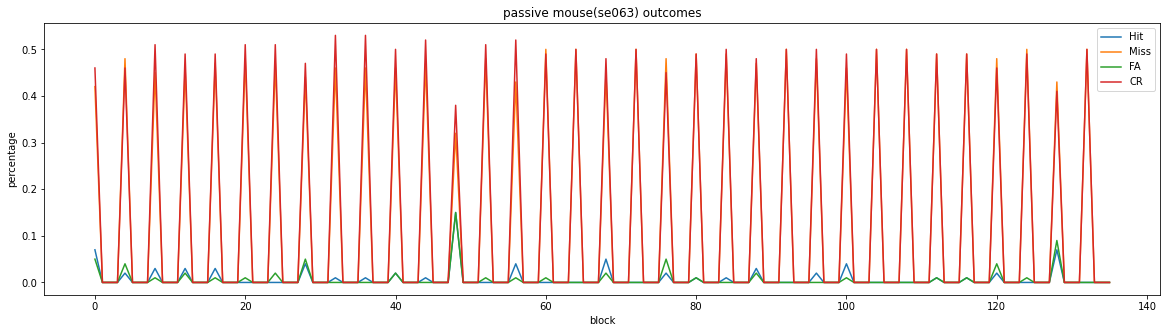

In [18]:
# plot pb outcomes
plt.figure(figsize=(20,5))
x = np.arange(nBlocks)
for i in range(4):
    plt.plot(x, pbRes[i], label=outcome_list[i])
plt.legend()
plt.xlabel('block')
plt.ylabel('percentage')
plt.title('passive mouse(se063) outcomes')

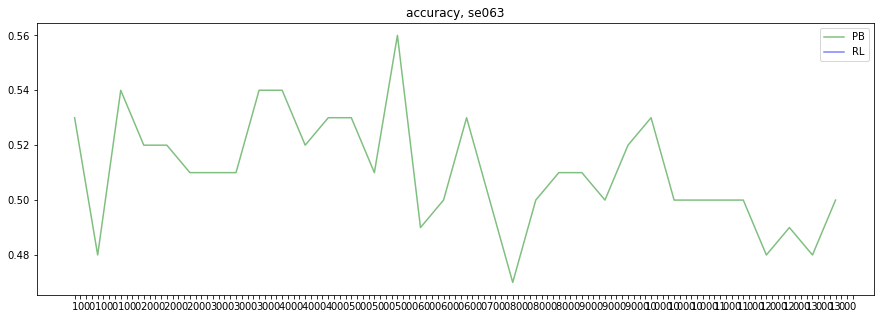

In [12]:
colors = np.array(["green", "blue"])
x = np.arange(nBlocks)
ptrue = pbRes[0] + pbRes[3]
rtrue = rlRes[0] + rlRes[3]

plt.figure(figsize=(15, 5))
p_nonzero = np.where(ptrue>0)
r_nonzero = np.where(rtrue>0)
plt.plot(x[p_nonzero], ptrue[p_nonzero], color=colors[0], alpha=0.5, label='PB')
plt.plot(x[r_nonzero], rtrue[r_nonzero], color=colors[1], alpha=0.5, label='RL')
plt.title('accuracy, {}'.format(mouse_name))
plt.xticks(x, days)
plt.legend()

In [86]:
print(np.where(nPB>20))

(array([11], dtype=int64),)


In [87]:
daymax = days.max()
dptrue = np.zeros(daymax)
drtrue = np.zeros(daymax)
for d in range(daymax):
    dind = np.where(days==(d+1))
    dnPB = nPB[dind]
    pbind = np.where(dnPB == 20)[0]
    # if has probe trial in a day
    if pbind.shape[0] > 0:
        tmp = ptrue[dind]
        dptrue[d] = np.average(tmp[pbind], weights=dnPB[pbind])
        print(tmp[pbind], dnPB[pbind])
    weights = 100 - dnPB
    drtrue[d] = np.average(rtrue[dind], weights=weights)

[0.45] [20.]
[0.55] [20.]
[0.6] [20.]
[0.5] [20.]
[0.55] [20.]
[0.55] [20.]
[0.55] [20.]
[0.75] [20.]
[0.65] [20.]
[0.75] [20.]
[0.8] [20.]
[0.85] [20.]
[0.6] [20.]
[0.85] [20.]


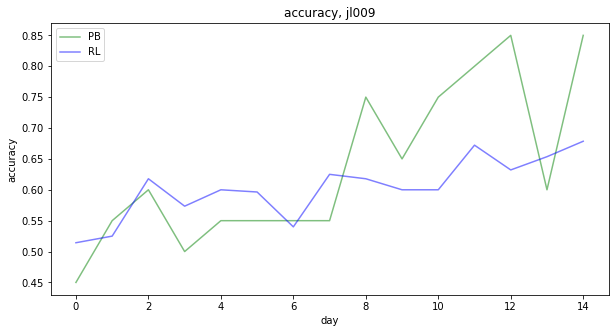

In [93]:
x = np.arange(daymax)
plt.figure(figsize=(10, 5))
dp_nonzero = np.where(dptrue>0)
dr_nonzero = np.where(drtrue>0)
plt.plot(x[dp_nonzero], dptrue[dp_nonzero], color=colors[0], alpha=0.5, label='PB')
plt.plot(x[dr_nonzero], drtrue[dr_nonzero], color=colors[1], alpha=0.5, label='RL')
# plt.plot(x, dptrue, color=colors[0], alpha=0.5, label='PB')
# plt.plot(x, drtrue, color=colors[1], alpha=0.5, label='RL')
plt.title('accuracy, {}'.format(mouse_name))
# plt.xticks(x, days)
plt.xlabel('day')
plt.ylabel('accuracy')
plt.legend()

## iterate all files - blocks

### performance (acc)

In [104]:
for n in range(len(all_mice)):
    mouse_name = all_mice[n]
    fig_save_path = os.path.join('figures', 'behavior-performance_{}'.format(mouse_name))
    beh_data_path = "{}:/Jenni/{}/behavior/justbehavior".format(drives[n], mouse_name)
    fnames = [_ for _ in os.listdir(beh_data_path) if _.endswith('txt')]

    from tkinter import Tcl
    fnames = Tcl().call('lsort', '-dict', fnames)

    nBlocks = len(fnames)
    pbRes = np.zeros((4, nBlocks))
    rlRes = np.zeros((4, nBlocks))
    nPB = np.zeros(nBlocks)
    for i in range(nBlocks):
        fpath = os.path.join(beh_data_path, fnames[i])
        bmat = load_behavior_txt(fpath)
        behavior = bmat[:, 12].reshape(-1).astype(int)
        outcome = bmat[:, 3].reshape(-1).astype(int)
        nPB[i] = np.sum(behavior==0)
        if nPB[i] > 0:
            pbIdx = np.where(behavior==0)
            pbOutcome = outcome[pbIdx]
            for j in range(4):
                pbRes[j, i] = np.sum(pbOutcome == j+1) / nPB[i]

        rlIdx = np.where(behavior==1)
        rlOutcome = outcome[rlIdx]
        for j in range(4):
            rlRes[j, i] = np.sum(rlOutcome == j+1) / (100 - nPB[i])

    colors = np.array(["green", "blue"])
    x = np.arange(nBlocks)
    ptrue = pbRes[0] + pbRes[3]
    rtrue = rlRes[0] + rlRes[3]
    plt.figure(figsize=(10, 5))
    p_nonzero = np.where(ptrue>0)
    r_nonzero = np.where(rtrue>0)
    plt.plot(x[p_nonzero], ptrue[p_nonzero], color=colors[0], alpha=0.5, label='PB')
    plt.plot(x[r_nonzero], rtrue[r_nonzero], color=colors[1], alpha=0.5, label='RL')
    plt.title('{}'.format(mouse_name))
    plt.xlabel('block')
    plt.ylabel('accuracy')
    plt.legend()
    plt.savefig(fig_save_path)
    plt.close()

### performance(acc), remove continous nonlicking trials

In [4]:
for n in range(len(all_mice)):
    mouse_name = all_mice[n]
    fig_save_path = os.path.join('figures', 'behavior-performance_{}_remove'.format(mouse_name))
    beh_data_path = "{}:/Jenni/{}/behavior/justbehavior".format(drives[n], mouse_name)
    fnames = [_ for _ in os.listdir(beh_data_path) if _.endswith('txt')]

    from tkinter import Tcl
    fnames = Tcl().call('lsort', '-dict', fnames)

    nBlocks = len(fnames)
    pbRes = np.zeros((4, nBlocks))
    rlRes = np.zeros((4, nBlocks))
    nPB = np.zeros(nBlocks)
    for i in range(nBlocks):
        fpath = os.path.join(beh_data_path, fnames[i])
        bmat = load_behavior_txt(fpath)
        behavior = bmat[:, 12].reshape(-1).astype(int)
        outcome = bmat[:, 3].reshape(-1).astype(int)
        nPB[i] = np.sum(behavior==0)
        if nPB[i] > 0:
            pbIdx = np.where(behavior==0)
            pbOutcome = outcome[pbIdx]
            for j in range(4):
                pbRes[j, i] = np.sum(pbOutcome == j+1) / nPB[i]

        rlIdx = np.where(behavior==1)
        rlOutcome = outcome[rlIdx]
        for j in range(4):
            rlRes[j, i] = np.sum(rlOutcome == j+1) / (100 - nPB[i])

    colors = np.array(["green", "blue"])
    x = np.arange(nBlocks)
    ptrue = pbRes[0] + pbRes[3]
    rtrue = rlRes[0] + rlRes[3]
    plt.figure(figsize=(10, 5))
    p_nonzero = np.where(ptrue>0)
    r_nonzero = np.where(rtrue>0)
    plt.plot(x[p_nonzero], ptrue[p_nonzero], color=colors[0], alpha=0.5, label='PB')
    plt.plot(x[r_nonzero], rtrue[r_nonzero], color=colors[1], alpha=0.5, label='RL')
    plt.title('{}'.format(mouse_name))
    plt.xlabel('block')
    plt.ylabel('accuracy')
    plt.legend()
    plt.savefig(fig_save_path)
    plt.close()

### FA and Miss

In [15]:
### FA and Miss
for n in range(len(all_mice)):
    mouse_name = all_mice[n]
    fig_save_path = os.path.join('figures', 'behavior-FAandMiss_{}'.format(mouse_name))
    beh_data_path = "{}:/Jenni/{}/behavior/justbehavior".format(drives[n], mouse_name)
    fnames = [_ for _ in os.listdir(beh_data_path) if _.endswith('txt')]

    from tkinter import Tcl
    fnames = Tcl().call('lsort', '-dict', fnames)

    nBlocks = len(fnames)
    pbRes = np.zeros((4, nBlocks))
    rlRes = np.zeros((4, nBlocks))
    nPB = np.zeros(nBlocks)
    for i in range(nBlocks):
        fpath = os.path.join(beh_data_path, fnames[i])
        bmat = load_behavior_txt(fpath)
        behavior = bmat[:, 12].reshape(-1).astype(int)
        outcome = bmat[:, 3].reshape(-1).astype(int)
        nPB[i] = np.sum(behavior==0)
        if nPB[i] > 0:
            pbIdx = np.where(behavior==0)
            pbOutcome = outcome[pbIdx]
            for j in range(4):
                pbRes[j, i] = np.sum(pbOutcome == j+1) / nPB[i]

        rlIdx = np.where(behavior==1)
        rlOutcome = outcome[rlIdx]
        for j in range(4):
            rlRes[j, i] = np.sum(rlOutcome == j+1) / (100 - nPB[i])

    colors = np.array(["green", "blue"])
    x = np.arange(nBlocks)
    pFA = pbRes[2]
    pMiss = pbRes[1]
    rFA = rlRes[2] 
    rMiss = rlRes[1]
    pHit = pbRes[0]
    pCR = pbRes[3]
    rHit = rlRes[0] 
    rCR = rlRes[3]
    plt.figure(figsize=(15, 10))
    pFA_nonzero = np.where(pFA>0)
    pMiss_nonzero = np.where(pMiss>0)
    rFA_nonzero = np.where(rFA>0)
    rMiss_nonzero = np.where(rMiss>0)
    pHit_nonzero = np.where(pHit>0)
    pCR_nonzero = np.where(pCR>0)
    rHit_nonzero = np.where(rHit>0)
    rCR_nonzero = np.where(rCR>0)
    
    plt.subplot(221)
    plt.plot(x[pHit_nonzero], pHit[pHit_nonzero], color=colors[0], label='PB')
    plt.plot(x[rHit_nonzero], rHit[rHit_nonzero], color=colors[1], label='RC')
    plt.title('Hit')
    plt.xlabel('block')
    plt.ylabel('Rate')
    plt.ylim([0, 1])
    plt.legend()
    
    plt.subplot(222)
    plt.plot(x[pCR_nonzero], pCR[pCR_nonzero], color=colors[0], label='PB')
    plt.plot(x[rCR_nonzero], rCR[rCR_nonzero], color=colors[1], label='RC')
    plt.title('Correct Rejection')
    plt.xlabel('block')
    plt.ylabel('Rate')
    plt.ylim([0, 1])
    plt.legend()
    
    plt.subplot(223)
    plt.plot(x[pFA_nonzero], pFA[pFA_nonzero], color=colors[0], label='PB')
    plt.plot(x[rFA_nonzero], rFA[rFA_nonzero], color=colors[1], label='RC')
    plt.title('False Alarm')
    plt.xlabel('block')
    plt.ylabel('Rate')
    plt.ylim([0, 1])
    plt.legend()
    
    plt.subplot(224)
    plt.plot(x[pMiss_nonzero], pMiss[pMiss_nonzero], color=colors[0], label='PB')
    plt.plot(x[rMiss_nonzero], rMiss[rMiss_nonzero], color=colors[1], label='RC')
    plt.title('Miss')
    plt.xlabel('block')
    plt.ylabel('Rate')
    plt.ylim([0, 1])
    plt.legend()
    
    plt.suptitle(mouse_name)
    plt.savefig(fig_save_path)
    plt.close()

## iterate all files - days

In [5]:
print('start')
from matplotlib.ticker import MaxNLocator
for n in range(len(all_mice)):
    mouse_name = all_mice[n]
    fig_save_path = os.path.join('figures', 'day-behavior-performance_{}'.format(mouse_name))
    beh_data_path = "{}:/Jenni/{}/behavior/justbehavior".format(drives[n], mouse_name)
    fnames = [_ for _ in os.listdir(beh_data_path) if _.endswith('txt')]

    from tkinter import Tcl
    fnames = Tcl().call('lsort', '-dict', fnames)

    nBlocks = len(fnames)
    pbRes = np.zeros((4, nBlocks))
    rlRes = np.zeros((4, nBlocks))
    nPB = np.zeros(nBlocks)
    days = np.zeros(nBlocks)
    for i in range(nBlocks):
        tmp = fnames[i].split('_')[-1]
        days[i] = int(tmp.split('v')[0])
        fpath = os.path.join(beh_data_path, fnames[i])
        bmat = load_behavior_txt(fpath)
        behavior = bmat[:, 12].reshape(-1).astype(int)
        outcome = bmat[:, 3].reshape(-1).astype(int)
        nPB[i] = np.sum(behavior==0)
        if nPB[i] > 0:
            pbIdx = np.where(behavior==0)
            pbOutcome = outcome[pbIdx]
            for j in range(4):
                pbRes[j, i] = np.sum(pbOutcome == j+1) / nPB[i]

        rlIdx = np.where(behavior==1)
        rlOutcome = outcome[rlIdx]
        for j in range(4):
            rlRes[j, i] = np.sum(rlOutcome == j+1) / (100 - nPB[i])
    days = days.astype('int')
    
    ptrue = pbRes[0] + pbRes[3]
    rtrue = rlRes[0] + rlRes[3]
    
    daymax = days.max()
    dptrue = np.zeros(daymax)
    drtrue = np.zeros(daymax)
    for d in range(daymax):
        dind = np.where(days==(d+1))
        dnPB = nPB[dind]
        pbind = np.where(dnPB == 20)[0]
        # if has probe trial in a day
        if pbind.shape[0] > 0:
            tmp = ptrue[dind]
            dptrue[d] = np.average(tmp[pbind], weights=dnPB[pbind])
        weights = 100 - dnPB
        drtrue[d] = np.average(rtrue[dind], weights=weights)

    colors = np.array(["green", "blue"])
    x = np.arange(1, daymax+1)
    plt.figure(figsize=(10, 5))
    dp_nonzero = np.where(dptrue>0)
    dr_nonzero = np.where(drtrue>0)
    plt.plot(x[dp_nonzero], dptrue[dp_nonzero], color=colors[0], alpha=0.5, label='PB')
    plt.plot(x[dr_nonzero], drtrue[dr_nonzero], color=colors[1], alpha=0.5, label='RL')
    plt.xlim([0, daymax+1])
    
    # plt.plot(x, dptrue, color=colors[0], alpha=0.5, label='PB')
    # plt.plot(x, drtrue, color=colors[1], alpha=0.5, label='RL')
    plt.title('{}'.format(mouse_name))
    # plt.xticks(x, days)
    plt.xlabel('day')
    plt.ylabel('accuracy')
    plt.legend()
    plt.savefig(fig_save_path)
    plt.close()

start


## remove continous nonlicking trials

In [4]:
print('start')
from matplotlib.ticker import MaxNLocator
for n in range(len(all_mice)):
    mouse_name = all_mice[n]
    fig_save_path = os.path.join('figures', 'day-behavior-performance_{}_remove'.format(mouse_name))
    beh_data_path = "{}:/Jenni/{}/behavior/justbehavior".format(drives[n], mouse_name)
    fnames = [_ for _ in os.listdir(beh_data_path) if _.endswith('txt')]

    from tkinter import Tcl
    fnames = Tcl().call('lsort', '-dict', fnames)

    nBlocks = len(fnames)
    pbRes = np.zeros((4, nBlocks))
    rlRes = np.zeros((4, nBlocks))
    nPB = np.zeros(nBlocks)
    days = np.zeros(nBlocks)
    for i in range(nBlocks):
        tmp = fnames[i].split('_')[-1]
        days[i] = int(tmp.split('v')[0])
        fpath = os.path.join(beh_data_path, fnames[i])
        bmat = load_behavior_txt(fpath)
        behavior = bmat[:, 12].reshape(-1).astype(int)
        outcome = bmat[:, 3].reshape(-1).astype(int)
        
        nonlick_flag = (outcome == 4) | (outcome == 2) # CR and Miss
        remove_flag = np.ones(nonlick_flag.shape)
        for j in range(20, len(nonlick_flag)):
            if np.sum(nonlick_flag[(j-20):j]) == 20:
                remove_flag[(j-20):j] = 0
        remove_flag = (remove_flag == 1)
        outcome = outcome[remove_flag]
        behavior = behavior[remove_flag]
        nPB[i] = np.sum(behavior==0)
        if nPB[i] > 0:
            pbIdx = np.where(behavior==0)
            pbOutcome = outcome[pbIdx]
            for j in range(4):
                pbRes[j, i] = np.sum(pbOutcome == j+1) / nPB[i]

        rlIdx = np.where(behavior==1)
        rlOutcome = outcome[rlIdx]
        for j in range(4):
            rlRes[j, i] = np.sum(rlOutcome == j+1) / (len(outcome) - nPB[i])
    days = days.astype('int')
    
    ptrue = pbRes[0] + pbRes[3]
    rtrue = rlRes[0] + rlRes[3]
    
    daymax = days.max()
    dptrue = np.zeros(daymax)
    drtrue = np.zeros(daymax)
    for d in range(daymax):
        dind = np.where(days==(d+1))
        dnPB = nPB[dind]
        pbind = np.where(dnPB == 20)[0]
        # if has probe trial in a day
        if pbind.shape[0] > 0:
            tmp = ptrue[dind]
            dptrue[d] = np.average(tmp[pbind], weights=dnPB[pbind])
        weights = 100 - dnPB
        drtrue[d] = np.average(rtrue[dind], weights=weights)

    colors = np.array(["green", "blue"])
    x = np.arange(1, daymax+1)
    plt.figure(figsize=(10, 5))
    dp_nonzero = np.where(dptrue>0)
    dr_nonzero = np.where(drtrue>0)
    plt.plot(x[dp_nonzero], dptrue[dp_nonzero], color=colors[0], alpha=0.5, label='PB')
    plt.plot(x[dr_nonzero], drtrue[dr_nonzero], color=colors[1], alpha=0.5, label='RL')
    plt.xlim([0, daymax+1])
    
    # plt.plot(x, dptrue, color=colors[0], alpha=0.5, label='PB')
    # plt.plot(x, drtrue, color=colors[1], alpha=0.5, label='RL')
    plt.title('{}'.format(mouse_name))
    # plt.xticks(x, days)
    plt.xlabel('day')
    plt.ylabel('accuracy')
    plt.legend()
    plt.savefig(fig_save_path)
    plt.close()

start


C:\Users\fdu5\AppData\Local\Temp\7/ipykernel_49276/3805124191.py:43: RuntimeWarning: invalid value encountered in true_divide
  rlRes[j, i] = np.sum(rlOutcome == j+1) / (len(outcome) - nPB[i])
C:\Users\fdu5\AppData\Local\Temp\7/ipykernel_49276/3805124191.py:43: RuntimeWarning: invalid value encountered in true_divide
  rlRes[j, i] = np.sum(rlOutcome == j+1) / (len(outcome) - nPB[i])


# Outcome history

## per block

In [22]:
print('start')
NT = 100 # n trials per block
from matplotlib.ticker import MaxNLocator
for n in range(len(all_mice)):
    mouse_name = all_mice[n]
    fig_save_path = os.path.join('figures', 'day-behavior-performance_{}'.format(mouse_name))
    beh_data_path = "{}:/Jenni/{}/behavior/justbehavior".format(drives[n], mouse_name)
    fnames = [_ for _ in os.listdir(beh_data_path) if _.endswith('txt')]

    from tkinter import Tcl
    fnames = Tcl().call('lsort', '-dict', fnames)

    nBlocks = len(fnames)
    befores = np.zeros((4, 4, nBlocks))
    afters = np.zeros((4, 4, nBlocks))
    days = np.zeros(nBlocks)

    for i in range(nBlocks):
        tmp = fnames[i].split('_')[-1]
        days[i] = int(tmp.split('v')[0])
        fpath = os.path.join(beh_data_path, fnames[i])
        bmat = load_behavior_txt(fpath)
        behavior = bmat[:, 12].reshape(-1).astype(int)
        outcome = bmat[:, 3].reshape(-1).astype(int)

        for outcome_index in range(1,5):
            # hit responses
            ioutcome = np.where(outcome == outcome_index)[0]
            if len(ioutcome) > 0:
                ibefore = ioutcome-1
                iafter = ioutcome+1
                # remove not valid indexes
                idx = np.where((0<=ibefore)&(ibefore<NT))[0]
                ibefore = ibefore[idx]
                idx = np.where((0<=iafter)&(iafter<NT))[0]
                iafter = iafter[idx]
                ibefore = outcome[ibefore]
                iafter = outcome[iafter]
                for k in range(1,5):
                    idx = np.where(ibefore==k)[0]
                    befores[outcome_index-1, k-1, i] = len(idx) / len(ioutcome)
                    idx = np.where(iafter==k)[0]
                    afters[outcome_index-1, k-1, i] = len(idx) / len(ioutcome)



    fig = plt.figure(figsize=(20, 10))
    fig.patch.set_facecolor('white')
    for outcome_index in range(1,5):
        # plt.subplot(2,4,outcome_index)
        plt.subplot(2,2,outcome_index)
        plt.title('before {}, {}'.format(outcome_list[outcome_index-1], mouse_name))
        for i in range(4):
            plt.plot(np.arange(nBlocks), befores[outcome_index-1, i], label=outcome_list[i])
        plt.legend()
        plt.ylabel('percentage')
        plt.xlabel('day')
        plt.ylim([0,1])
        plt.xticks(np.arange(nBlocks), days.astype(int))
    #     plt.subplot(2,4,4+outcome_index)
    #     plt.title('after {}'.format(outcome_list[outcome_index-1]))
    #     for i in range(4):
    #         plt.plot(days, afters[outcome_index-1, i], label=outcome_list[i])
    #     plt.legend()
    #     plt.ylabel('percentage')
    #     plt.xlabel('day')
    #     plt.ylim([0,1])
    # plt.suptitle('day {}'.format(day))
    plt.tight_layout()
    fig_save_path = os.path.join('figures',  'outcome_distribution_per-block_{}'.format(mouse_name))
    plt.savefig(fig_save_path, dpi=100)
    plt.close()

    # plt.show()

start


In [31]:
print('start')
from matplotlib.ticker import MaxNLocator
for n in range(len(all_mice)):
    mouse_name = all_mice[n]
    fig_save_path = os.path.join('figures', 'day-behavior-performance_{}'.format(mouse_name))
    beh_data_path = "{}:/Jenni/{}/behavior/justbehavior".format(drives[n], mouse_name)
    fnames = [_ for _ in os.listdir(beh_data_path) if _.endswith('txt')]

    from tkinter import Tcl
    fnames = Tcl().call('lsort', '-dict', fnames)

    nBlocks = len(fnames)
    days = np.zeros(nBlocks)
    all_outcome = np.zeros((nBlocks, 100))

    for i in range(nBlocks):
        tmp = fnames[i].split('_')[-1]
        days[i] = int(tmp.split('v')[0])
        fpath = os.path.join(beh_data_path, fnames[i])
        bmat = load_behavior_txt(fpath)
        outcome = bmat[:, 3].reshape(-1).astype(int)
        all_outcome[i] = outcome
    
    all_days = np.unique(days)
    befores = np.zeros((4, 4, len(all_days)))
    afters = np.zeros((4, 4, len(all_days)))
    for i, day in enumerate(all_days):
        iBlocks = np.where(days==day)[0]
        daily_outcome = all_outcome[iBlocks].reshape(-1)
        NT = len(daily_outcome)
        
        for outcome_index in range(1,5):
            # hit responses
            ioutcome = np.where(daily_outcome == outcome_index)[0]
            if len(ioutcome) > 0:
                ibefore = ioutcome-1
                iafter = ioutcome+1
                # remove not valid indexes
                idx = np.where((0<=ibefore)&(ibefore<NT))[0]
                ibefore = ibefore[idx]
                ibefore = daily_outcome[ibefore]
                if len(ibefore)>0:
                    for k in range(1,5):
                        idx = np.where(ibefore==k)[0]
                        befores[outcome_index-1, k-1, i] = len(idx) / len(ibefore)

    fig = plt.figure(figsize=(20, 10))
    fig.patch.set_facecolor('white')
    for outcome_index in range(1,5):
        # plt.subplot(2,4,outcome_index)
        plt.subplot(2,2,outcome_index)
        plt.title('before {}, {}'.format(outcome_list[outcome_index-1], mouse_name))
        for i in range(4):
            plt.plot(all_days.astype(int), befores[outcome_index-1, i], label=outcome_list[i])
        plt.legend()
        plt.ylabel('percentage')
        plt.xlabel('day')
        plt.ylim([0,1])
    plt.tight_layout()
    fig_save_path = os.path.join('figures',  'outcome_distribution_per-day_{}'.format(mouse_name))
    plt.savefig(fig_save_path, dpi=100)
    plt.close()

    # plt.show()

start


In [30]:
print(np.sum(befores, axis=1))

[[1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
  1. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1.]]


# sliding window performance of outcoes

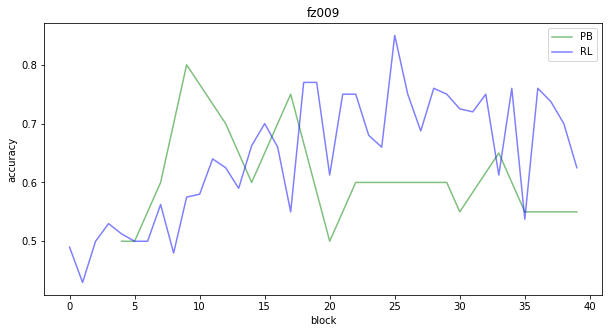

In [19]:
# for n in range(len(all_mice)):
n=1
mouse_name = all_mice[n]
fig_save_path = os.path.join('figures', 'behavior-performance_{}'.format(mouse_name))
beh_data_path = "{}:/Jenni/{}/behavior/justbehavior".format(drives[n], mouse_name)
fnames = [_ for _ in os.listdir(beh_data_path) if _.endswith('txt')]

from tkinter import Tcl
fnames = Tcl().call('lsort', '-dict', fnames)

nBlocks = len(fnames)
pbRes = np.zeros((4, nBlocks))
rlRes = np.zeros((4, nBlocks))
nPB = np.zeros(nBlocks)
for i in range(nBlocks):
    fpath = os.path.join(beh_data_path, fnames[i])
    bmat = load_behavior_txt(fpath)
    behavior = bmat[:, 12].reshape(-1).astype(int)
    outcome = bmat[:, 3].reshape(-1).astype(int)
    nPB[i] = np.sum(behavior==0)
    if nPB[i] > 0:
        pbIdx = np.where(behavior==0)
        pbOutcome = outcome[pbIdx]
        for j in range(4):
            pbRes[j, i] = np.sum(pbOutcome == j+1) / nPB[i]

    rlIdx = np.where(behavior==1)
    rlOutcome = outcome[rlIdx]
    for j in range(4):
        rlRes[j, i] = np.sum(rlOutcome == j+1) / (100 - nPB[i])

colors = np.array(["green", "blue"])
x = np.arange(nBlocks)
ptrue = pbRes[0] + pbRes[3]
rtrue = rlRes[0] + rlRes[3]
plt.figure(figsize=(10, 5))
p_nonzero = np.where(ptrue>0)
r_nonzero = np.where(rtrue>0)
plt.plot(x[p_nonzero], ptrue[p_nonzero], color=colors[0], alpha=0.5, label='PB')
plt.plot(x[r_nonzero], rtrue[r_nonzero], color=colors[1], alpha=0.5, label='RL')
plt.title('{}'.format(mouse_name))
plt.xlabel('block')
plt.ylabel('accuracy')
plt.legend()
plt.show()
# plt.savefig(fig_save_path)
# plt.close()

In [26]:
n=0
mouse_name = all_mice[n]
fig_save_path = os.path.join('figures', 'behavior-performance_{}'.format(mouse_name))
beh_data_path = "{}:/Jenni/{}/behavior/justbehavior".format(drives[n], mouse_name)
fnames = [_ for _ in os.listdir(beh_data_path) if _.endswith('txt')]

from tkinter import Tcl
fnames = Tcl().call('lsort', '-dict', fnames)

nBlocks = len(fnames)
nPB = np.zeros(nBlocks)
n_outcomes = np.zeros((4, nBlocks))
for i in range(nBlocks):
    fpath = os.path.join(beh_data_path, fnames[i])
    bmat = load_behavior_txt(fpath)
    behavior = bmat[:, 12].reshape(-1).astype(int)
    outcome = bmat[:, 3].reshape(-1).astype(int)
    for j in range(4):
        n_outcomes[j, i] = np.sum(outcome == (j+1)) / len(outcome)

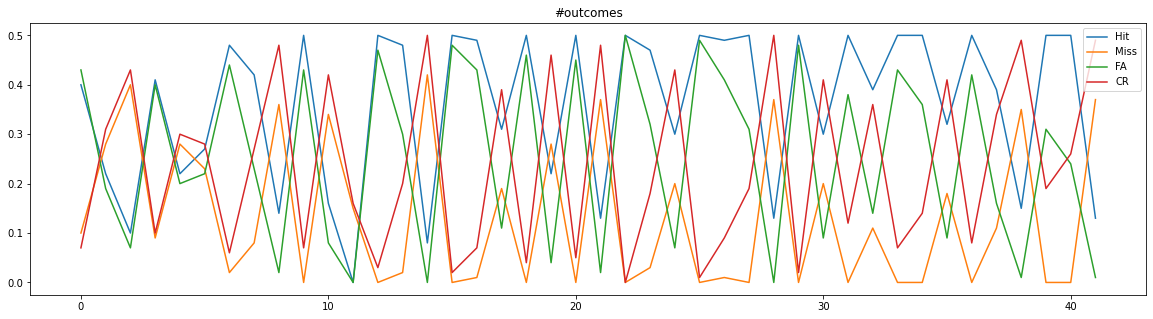

In [28]:
plt.figure(figsize=(20, 5))
cmap = plt.cm.get_cmap('tab10')
for i in range(4):
    plt.plot(np.arange(nBlocks), n_outcomes[i], label=outcome_list[i], c=cmap(i))
plt.title('#outcomes')
plt.legend()

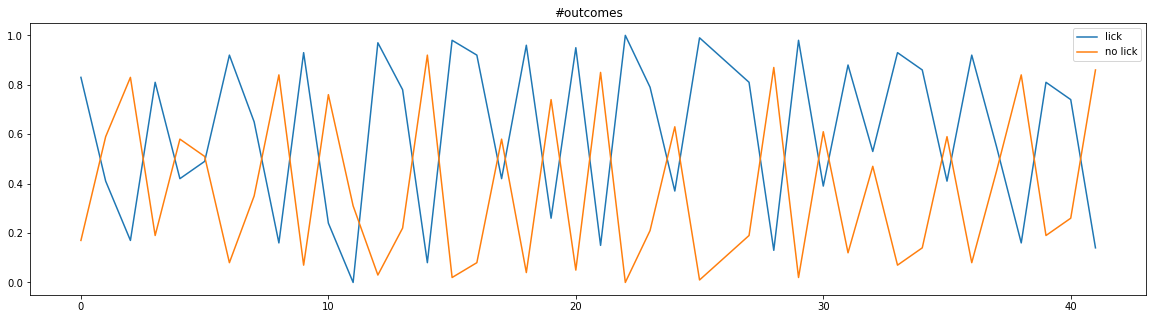

In [23]:
plt.figure(figsize=(20, 5))
plt.plot(np.arange(nBlocks), n_outcomes[0]+n_outcomes[2], label='lick')
plt.plot(np.arange(nBlocks), n_outcomes[1]+n_outcomes[3], label='no lick')
plt.title('#outcomes')
plt.legend()

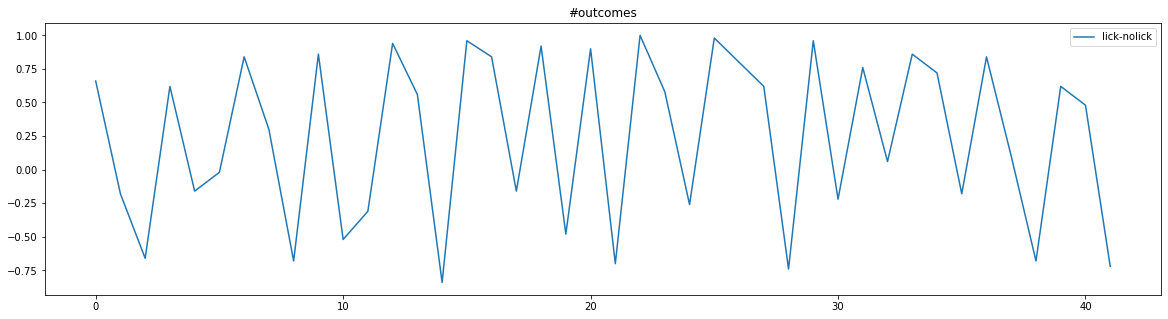

In [24]:
plt.figure(figsize=(20, 5))
plt.plot(np.arange(nBlocks), n_outcomes[0]+n_outcomes[2] -(n_outcomes[1]+n_outcomes[3]) , label='lick-nolick')
plt.title('#outcomes')
plt.legend()

No handles with labels found to put in legend.


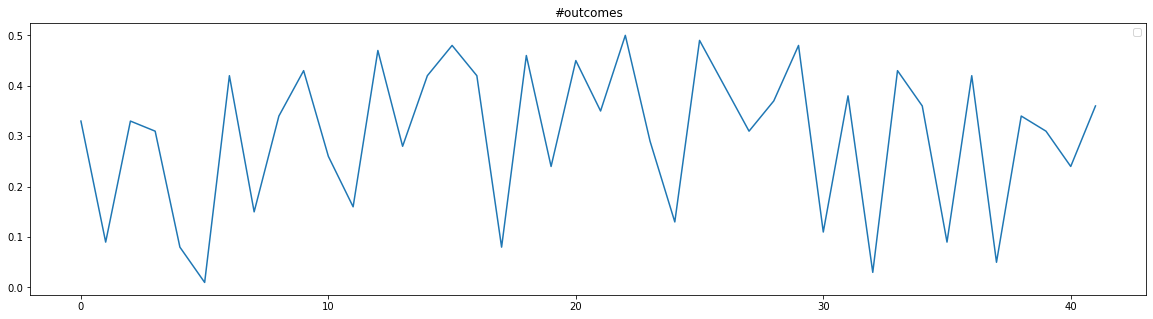

In [30]:
plt.figure(figsize=(20, 5))
plt.plot(np.arange(nBlocks), np.abs(n_outcomes[0]-n_outcomes[3]))
plt.title('#outcomes')
plt.legend()

# performance plot

## per block

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import os
import scipy.io
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import pearsonr, zscore
from scipy.io import savemat
import random
from utils import daily_blocks, extract_all_licks, get_tone_response_df, block_stim_evoke_response, load_behavior_txt
from sklearn.decomposition import PCA
from matplotlib import transforms

def remove_false(inputx, inputy):
    inputy = np.array(inputy)
    inputx = np.array(inputx)
    valid_ind = np.where(inputy > 0)[0]
    return inputx[valid_ind], inputy[valid_ind]

from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
def smooth_line(inputx, inputy):
    xx = np.linspace(inputx.min(),inputx.max(), 1000)
    itp = interp1d(inputx,inputy, kind='linear')
    window_size, poly_order = 301, 2
    yy = savgol_filter(itp(xx), window_size, poly_order) # smooth
    return xx, yy

print('start')
outcome_list = ['Hit', 'Miss', 'FA', 'CR']
mouse_names = ['jl009', 'fz017', 'fz009', 'fz006']
data_paths = ["Z:/Jenni/jl009/behavimaging.mat",
             "W:/Jenni/fz017/behavimaging.mat",
             "Y:/Jenni/fz009/behavimaging.mat",
             "Y:/sarah/fz006/behavimaging.mat"]
disks = ['Z', 'W', 'Y', 'Y']
pre_window = 45
post_window = 45
mouse_id = 0
showfig = True
for mouse_id in range(4):
    mouse_name = mouse_names[mouse_id]
    disk = disks[mouse_id]

    data_path = "{}_behavimaging.mat".format(mouse_name)
    mat = scipy.io.loadmat(data_path)
    data = mat['behavimaging']
    nDays = data[0, -1]['day'][0][0]
    blocks = []
    days = []
    hf_accs = []
    hf_weights = []
    valid_days = []
    for day in range(1, nDays+1):
        iblocks = daily_blocks(data, day)
        if len(iblocks)>0:
            valid_days.append(day)
            
    if mouse_name == 'jl009':
        valid_days = [1, 2, 3, 5, 6, 7, 8, 9, 15]
    if mouse_name == 'fz017':
        valid_days = [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 17, 23, 24, 25, 26]
    for i, day in enumerate(valid_days):
        iblocks = daily_blocks(data, day)
        if len(iblocks)>0:
            for iblock in iblocks:
                blocks.append(iblock)
                days.append(day)
                
    rl_performance = []
    pb_performance = []
    for i, iblock in enumerate(blocks):
        block = data[0, iblock]
        # normalize doesn't have much effect on the result, so set it to OBlse
        cues, outcomes, firstlicks, stim_resp, alllicks = block_stim_evoke_response(block, window=[pre_window, 45], normalize=True, dff=False)
        performance = (np.sum(outcomes==1) + np.sum(outcomes==4))/len(outcomes)
        rl_performance.append(performance)
        if len(np.where(cues==3)[0]) > 0:
            pb_ind = np.hstack([np.where(cues==3)[0], np.where(cues==4)[0]])
            pb_outcomes = outcomes[pb_ind]
            performance = (np.sum(pb_outcomes==1) + np.sum(pb_outcomes==4))/len(pb_outcomes)
        else:
            performance = 0
        pb_performance.append(performance)

    if showfig:
        plt.rcParams['font.size'] = 12
        plt.rcParams['legend.fontsize'] = 12
        plt.figure(figsize=(10, 5))
        x = np.arange(len(blocks))
        xx, yy = remove_false(x, rl_performance)
        plt.plot(xx, yy, label='reinforce', color='black')
        xx, yy = remove_false(x, pb_performance)
        plt.plot(xx, yy, label='probe', color='red')
        plt.xlabel('day')
        plt.ylabel('accuracy')
        plt.title('behavior performance, {}'.format(mouse_name))
        plt.axhline(0.5, linestyle=':', color='gray', alpha=0.5)
        plt.ylim([0.3,1])
        plt.legend(loc=4)
        plt.xticks(x, labels=days, fontsize=8)
        ax = plt.gca()
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.savefig('figure/behavior_raw_{}'.format(mouse_name))
        plt.close()

        plt.figure(figsize=(10, 5))
        x = np.arange(len(blocks))
        xx, yy = remove_false(x, rl_performance)
        xx, yy = smooth_line(xx, yy)
        plt.plot(xx, yy, label='reinforce', color='black', linestyle=':')
        xx, yy = remove_false(x, pb_performance)
        xx, yy = smooth_line(xx, yy)
        plt.plot(xx, yy, label='probe', color='red', linestyle=':')
        plt.xlabel('day')
        plt.ylabel('accuracy')
        plt.title('behavior performance, {}'.format(mouse_name))
        plt.axhline(0.5, linestyle=':', color='gray', alpha=0.5)
        plt.ylim([0.3,1])
        plt.legend(loc=4)
        plt.xticks(x, labels=days, fontsize=8)
        ax = plt.gca()
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.savefig('figure/behavior_smooth_{}'.format(mouse_name))
        plt.close()
print('finish')

start
finish


In [12]:
mouse_id = 0
for mouse_id in range(4):
    mouse_name = mouse_names[mouse_id]
    disk = disks[mouse_id]

    data_path = "{}_behavimaging.mat".format(mouse_name)
    mat = scipy.io.loadmat(data_path)
    data = mat['behavimaging']
    blocks = []
    valid_days = []

    for day in range(1, nDays+1):
        iblocks = daily_blocks(data, day)
        if len(iblocks)>0:
            valid_days.append(day)

    if mouse_name == 'jl009':
        valid_days = [1, 2, 3, 5, 6, 7, 8, 9, 15]
    if mouse_name == 'fz017':
        valid_days = [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 17, 23, 24, 25, 26]
        
    rl_performance = []
    pb_performance = []
    hf_accs = []
    hf_weights = []
    mc_accs = []
    mc_weights = []

    for i, day in enumerate(valid_days):
        print('-------------------day {}---------------------'.format(day))
        iblocks = daily_blocks(data, day)
        if len(iblocks)>0:
            daily_cues = []
            daily_outcomes = []
            daily_responses = []
            daily_firstlicks = []
            daily_alllicks = []
            daily_responses = []
            valid = True
            for j in iblocks:
                block = data[0, j]
                # normalize doesn't have much effect on the result, so set it to OBlse
                cues, outcomes, firstlicks, stim_resp, alllicks = block_stim_evoke_response(block, window=[pre_window, 45], normalize=True, dff=False)
                if len(daily_responses) > 0:
                    if daily_responses[0].shape != stim_resp.shape:
                        valid = False
                if valid == True:
                    daily_responses.append(stim_resp)
                    daily_cues.append(cues)
                    daily_outcomes.append(outcomes)
                    daily_firstlicks.append(firstlicks)
                    daily_alllicks.append(alllicks)

            daily_cues = np.hstack(daily_cues)
            daily_outcomes = np.hstack(daily_outcomes)
            daily_alllicks = np.vstack(daily_alllicks)
            daily_responses = np.vstack(daily_responses)

            performance = (np.sum(daily_outcomes==1) + np.sum(daily_outcomes==4))/len(daily_outcomes)
            print('[day {}, behavior performance {:.2f}%]'.format(day, performance*100))
            rl_performance.append(performance)
            pb_ind = np.hstack([np.where(daily_cues==3)[0], np.where(daily_cues==4)[0]])
            pb_outcomes = daily_outcomes[pb_ind]
            performance = (np.sum(pb_outcomes==1) + np.sum(pb_outcomes==4))/len(pb_outcomes)
            pb_performance.append(performance)
    
    if showfig:
        plt.rcParams['font.size'] = 15
        plt.rcParams['legend.fontsize'] = 12
        plt.figure(figsize=(10, 5))
        x = np.arange(len(valid_days))
        xx, yy = remove_false(x, rl_performance)
        plt.plot(xx, yy, label='reinforce', color='black')
        xx, yy = remove_false(x, pb_performance)
        plt.plot(xx, yy, label='probe', color='red')
        plt.xlabel('day')
        plt.ylabel('accuracy')
        plt.title('behavior performance, {}'.format(mouse_name))
        plt.axhline(0.5, linestyle=':', color='gray', alpha=0.5)
        plt.ylim([0.3,1])
        plt.legend(loc=4)
        plt.xticks(x, labels=valid_days)
        ax = plt.gca()
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.savefig('figure/behavior_day_raw_{}'.format(mouse_name))
        plt.close()
        
print('finish')

-------------------day 1---------------------
[day 1, behavior performance 51.00%]
-------------------day 2---------------------
[day 2, behavior performance 52.67%]
-------------------day 3---------------------
[day 3, behavior performance 61.67%]
-------------------day 5---------------------
[day 5, behavior performance 60.50%]
-------------------day 6---------------------
[day 6, behavior performance 59.33%]
-------------------day 7---------------------
[day 7, behavior performance 61.00%]
-------------------day 8---------------------
[day 8, behavior performance 58.00%]
-------------------day 9---------------------
[day 9, behavior performance 62.67%]
-------------------day 15---------------------
[day 15, behavior performance 69.00%]
-------------------day 1---------------------
[day 1, behavior performance 47.67%]
-------------------day 2---------------------
[day 2, behavior performance 48.00%]
-------------------day 4---------------------
[day 4, behavior performance 49.50%]
--

C:\Users\fdu5\AppData\Local\Temp\7/ipykernel_55432/165566229.py:64: RuntimeWarning: invalid value encountered in long_scalars
  performance = (np.sum(pb_outcomes==1) + np.sum(pb_outcomes==4))/len(pb_outcomes)


[day 5, behavior performance 56.00%]
-------------------day 11---------------------
[day 11, behavior performance 71.67%]
-------------------day 12---------------------
[day 12, behavior performance 73.00%]
-------------------day 1---------------------
[day 1, behavior performance 57.00%]
-------------------day 2---------------------
[day 2, behavior performance 55.00%]
-------------------day 3---------------------


C:\Users\fdu5\AppData\Local\Temp\7/ipykernel_55432/165566229.py:64: RuntimeWarning: invalid value encountered in long_scalars
  performance = (np.sum(pb_outcomes==1) + np.sum(pb_outcomes==4))/len(pb_outcomes)


[day 3, behavior performance 50.50%]
-------------------day 4---------------------
[day 4, behavior performance 51.50%]
-------------------day 5---------------------
[day 5, behavior performance 49.50%]
-------------------day 6---------------------
[day 6, behavior performance 51.50%]
-------------------day 9---------------------
[day 9, behavior performance 52.00%]
-------------------day 10---------------------
[day 10, behavior performance 48.00%]
-------------------day 11---------------------
[day 11, behavior performance 49.50%]
-------------------day 15---------------------
[day 15, behavior performance 52.50%]
finish


In [20]:
mouse_names = ['jl009', 'fz017', 'fz009', 'fz006']
print('start')
mouse_id = 0
for mouse_id in range(4):
    mouse_name = mouse_names[mouse_id]
    disks = ['Z', 'W', 'Y', 'Y']
    beh_data_path = "{}:/Jenni/{}/behavior/justbehavior".format(disks[mouse_id], mouse_name)
    if mouse_name == 'fz006':
        beh_data_path = 'Y:/sarah/fz006/behavior/justbehavior'
    fnames = [_ for _ in os.listdir(beh_data_path) if _.endswith('txt')]

    from tkinter import Tcl
    fnames = Tcl().call('lsort', '-dict', fnames)

    nBlocks = len(fnames)
    pbRes = np.zeros((4, nBlocks))
    rlRes = np.zeros((4, nBlocks))
    nPB = np.zeros(nBlocks)
    days = np.zeros(nBlocks)
    for i in range(nBlocks):
        tmp = fnames[i].split('_')[-1]
        days[i] = int(tmp.split('v')[0])
        fpath = os.path.join(beh_data_path, fnames[i])
        bmat = load_behavior_txt(fpath)
        behavior = bmat[:, 12].reshape(-1).astype(int)
        outcome = bmat[:, 3].reshape(-1).astype(int)
        nPB[i] = np.sum(behavior==0)
        if nPB[i] > 0:
            pbIdx = np.where(behavior==0)
            pbOutcome = outcome[pbIdx]
            for j in range(4):
                pbRes[j, i] = np.sum(pbOutcome == j+1) / nPB[i]

        rlIdx = np.where(behavior==1)
        rlOutcome = outcome[rlIdx]
        for j in range(4):
            rlRes[j, i] = np.sum(rlOutcome == j+1) / (100 - nPB[i])
    days = days.astype('int')

    ptrue = pbRes[0] + pbRes[3]
    rtrue = rlRes[0] + rlRes[3]

    daymax = days.max()
    dptrue = np.zeros(daymax)
    drtrue = np.zeros(daymax)
    for d in range(daymax):
        dind = np.where(days==(d+1))
        dnPB = nPB[dind]
        pbind = np.where(dnPB == 20)[0]
        # if has probe trial in a day
        if pbind.shape[0] > 0:
            tmp = ptrue[dind]
            dptrue[d] = np.average(tmp[pbind], weights=dnPB[pbind])
        weights = 100 - dnPB
        drtrue[d] = np.average(rtrue[dind], weights=weights)

    plt.rcParams['font.size'] = 15
    plt.rcParams['legend.fontsize'] = 12
    plt.figure(figsize=(10, 5))
    x = np.arange(1, daymax+1)
    dp_nonzero = np.where(dptrue>0)
    dr_nonzero = np.where(drtrue>0)
    plt.plot(x[dp_nonzero], dptrue[dp_nonzero], label='probe', color='red')
    plt.plot(x[dr_nonzero], drtrue[dr_nonzero], label='reinforce', color='black')
    plt.xlim([0, daymax+1])
    plt.xlabel('day')
    plt.ylabel('accuracy')
    plt.title('behavior performance, {}'.format(mouse_name))
    plt.axhline(0.5, linestyle=':', color='gray', alpha=0.5)
    plt.ylim([0.3,1])
    plt.legend(loc=4)
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.savefig('figure/behavior_block_raw_{}'.format(mouse_name))
    plt.close()


start
